In [1]:
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# On charge le dataset
house_data = pd.read_csv('house.csv') 
print(type(house_data)) #un dataframe se comporte comme un dictionnaire dont les clefs sont les noms des colonnes et les valeurs sont des séries.
print(house_data.shape) #renvoie la dimension du dataframe sous forme (nombre de lignes, nombre de colonnes)
house_data.head(10)#renvoie les  premières lignes

<class 'pandas.core.frame.DataFrame'>
(545, 2)


,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70
5,970,24
6,1560,41
7,1960,67
8,2000,63
9,2600,70


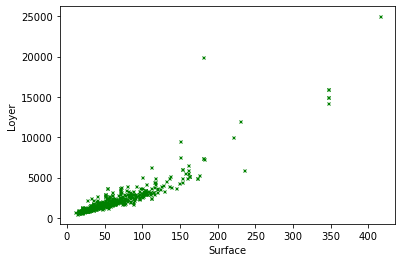

In [2]:
# On affiche le nuage de points dont on dispose
plt.plot(house_data['surface'], house_data['loyer'], 'gx', markersize=3)
plt.xlabel('Surface')
plt.ylabel('Loyer')
plt.show()

In [10]:
#La modélisation par une droite de la relation entre la surface  et le loyer qui semble correspondre à une 
#bonne approxiamation de la liaison mais il faut supprimer les outliers
house_data = house_data[house_data['loyer'] < 6000]
# On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
x = np.array([house_data['surface']]).T


In [13]:
X = np.array([house_data['surface'].values,np.ones(house_data.shape[0])]).T
y = np.array(house_data['loyer']).T
print(y.shape)
y=y.reshape(y.shape[0],1)
print(y.shape)
# On effectue le calcul exact du paramètre theta
#theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta=np.random.randn(2,1)


(527,)
(527, 1)


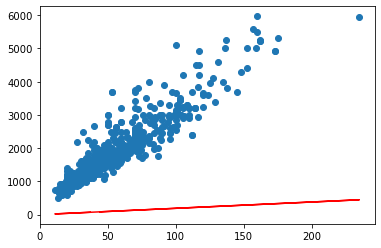

In [5]:
def model(X,theta):
    return X.dot(theta)
plt.scatter(x, y)
plt.plot(x,model(X,theta),c='r')

Intercept value [399.45943548]
Coef value [[27.74802172]]
<class 'numpy.ndarray'>
Prediction du loyer pour une surface de  : [[5949.06378045]]
Coeff R2 = 0.8432705668623944


(527, 1)

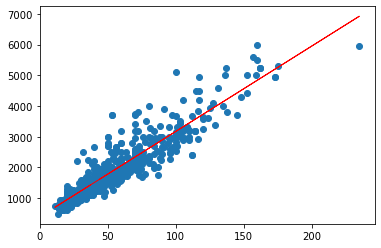

In [6]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x, y)
print('Intercept value', regr.intercept_)
print('Coef value', regr.coef_)
plt.scatter(x,y)
plt.plot(x, regr.predict(x), c='red', lw = 1)
print(type(x))
print('Prediction du loyer pour une surface de  :', regr.predict([[200]]))
print ('Coeff R2 =',regr.score(x,y))
y.shape
#regr.predict(<des données de test>)